# Class 3

In [23]:
author__ = 'Havy'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Maximum a Posteriori

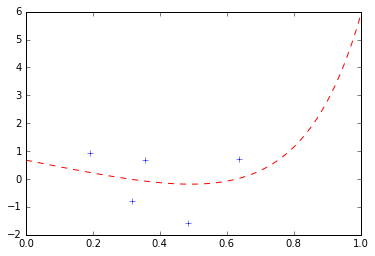

In [24]:
Sources = 5
Sigma = 0.1
Labnda = 0.6
P = 100
num = 5

X = np.random.rand(Sources)
Y = np.random.rand(Sources)
Y = (Y - np.mean(Y))/ np.std(Y)

Phi = np.column_stack([X**i for i in range(P)])
Mu = np.dot(np.linalg.inv((Sigma**2 / Labnda**2) * np.identity(P) + np.dot(Phi.T, Phi)), np.dot(Phi.T, Y))

Xstar = np.linspace(np.min(Phi),np.max(Phi),P)
Phistar = np.column_stack([Xstar**i for i in range(P)])

plt.plot(X,Y,'+b')
plt.plot(Xstar, np.dot(Phistar, Mu),'--r')
plt.show()

## Bayesian Regression

In [25]:
Sigma = 0.3
Labnda = 0.4

I = np.identity(P)
Vn = np.linalg.inv(((1/Sigma**2) * I) + ((1/Labnda**2) * np.dot(Phi.T, Phi)))
m = (1 /Sigma**2 ) * np.dot(Vn , np.dot(Phi.T, Y))
M = np.dot(Phistar, m)
Sigma2 = (Sigma**2 * I) + np.dot(Phistar, np.dot(Vn, Phistar.T))

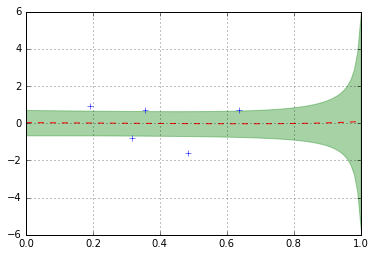

In [26]:
plt.plot(X,Y,'+b')
plt.plot(Xstar, M,'--r')
plt.fill_between(Xstar, M-np.sqrt(np.diag(Sigma2))*1.96, M+np.sqrt(np.diag(Sigma2))*1.96, color='g',alpha=0.35)
plt.grid(True)
plt.show()